In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('3b movies_GloVe.csv')
country_codes = pd.read_csv('country_codes.csv')

In [3]:
def get_numbers(str):
    """Return the integer numbers from a string in an array format."""
    arr = str.replace(',','').replace('{','').replace('}','').replace('[','').replace(']','').split()
    arr = [int(s) for s in arr if s.isdigit()]
    return arr

def get_country_codes(str):
    """Return the codes of the countries from a string."""
    arr = str.replace(',','').replace('{','').replace('}','').replace('[','').replace(']','').replace("'", "").split()
    arr = [s for s in arr if country_codes['Code'].str.contains(s).any()]
    return arr

def prepare_dataframe(movies):
    
    movies = movies.drop(['id', 'title'], axis=1)
    
    # Categorical values are not used, because of the algorithm
    numeric = movies.drop(['adult', 'genres', 'original_language', 'production_companies', 'production_countries'], axis=1)
    
    # Scale the numeric values to (0, 1) interval
    scaler = MinMaxScaler()
    numeric = scaler.fit_transform(numeric)
    
    movievectors = pd.DataFrame(numeric)
    
    return movievectors

In [4]:
movies = prepare_dataframe(movies)

Optimize the number of dimensions and the number of clusters together:

In [5]:
df1 = pd.DataFrame(columns=['Number of dimensions', 'Number of clusters', 'Silhouette score'])

for dimensions in range(1,4):
    for clusters in range(2,6):
        pca = PCA(dimensions)
        transformed_movies = pca.fit_transform(movies)
        
        kmeans = KMeans(clusters)
        kmeans.fit(transformed_movies)
        
        sil_score = silhouette_score(transformed_movies, kmeans.predict(transformed_movies))
        
        scores = pd.DataFrame([[dimensions, clusters, sil_score]],
                          columns=['Number of dimensions', 'Number of clusters', 'Silhouette score'])
        df1 = pd.concat([df1, scores], axis=0)

In [6]:
df1 = df1.reset_index().drop('index', axis=1)

In [7]:
df1

,Number of dimensions,Number of clusters,Silhouette score
0,1,2,0.738348
1,1,3,0.565010
2,1,4,0.546176
3,1,5,0.540075
4,2,2,0.561657
5,2,3,0.495773
6,2,4,0.396712
7,2,5,0.390375
8,3,2,0.468722
9,3,3,0.365006


Visualization:

In [41]:
pca = PCA(2)
transformed_movies = pca.fit_transform(movies)
        
kmeans = KMeans(2)
kmeans.fit(transformed_movies)

KMeans(n_clusters=2)

In [42]:
df2 = pd.concat([pd.DataFrame(transformed_movies),
                 pd.DataFrame(kmeans.predict(transformed_movies), columns=['Cluster'])], axis=1)

<AxesSubplot:xlabel='0', ylabel='1'>

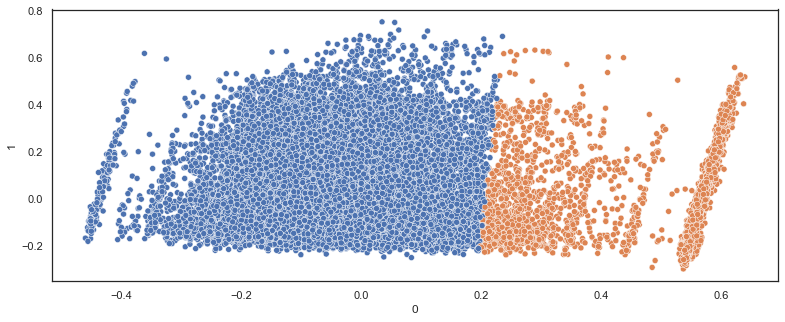

In [43]:
# Visualize the results
sns.set_theme(style="white")
plt.figure(figsize=(13,5))

sns.scatterplot(x=df2[0], y=df2[1], hue=df2['Cluster'], legend=False)

In [44]:
pca = PCA(2)
transformed_movies = pca.fit_transform(movies)
        
kmeans = KMeans(5)
kmeans.fit(transformed_movies)

KMeans(n_clusters=5)

In [45]:
df2 = pd.concat([pd.DataFrame(transformed_movies),
                 pd.DataFrame(kmeans.predict(transformed_movies), columns=['Cluster'])], axis=1)

<AxesSubplot:xlabel='0', ylabel='1'>

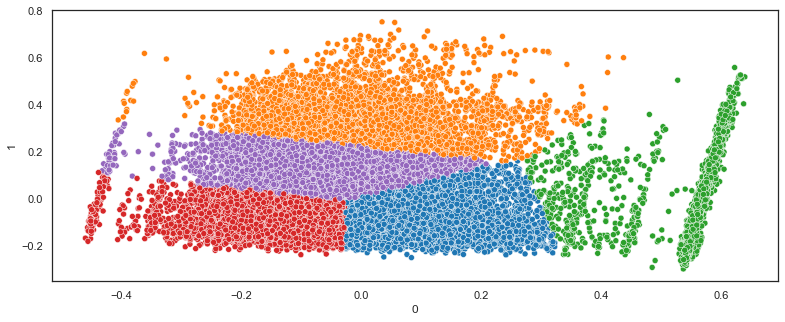

In [47]:
# Visualize the results
sns.set_theme(style="white")
plt.figure(figsize=(13,5))

sns.scatterplot(x=df2[0], y=df2[1], hue=df2['Cluster'], legend=False, palette='tab10')